# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
from google.colab import files
file= files.upload()

df = pd.read_csv('insurance.csv')
df2 = df.copy()

Saving insurance.csv to insurance.csv


# EDA

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Missing Value Count
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
'''age, bmi, children are not skewness. Because they have similar mean and median.
Charges mean > median,  it might be right skewness.'''


'age, bmi, children are not skewness. Because they have similar mean and median.\nCharges mean > median,  it might be right skewness.'

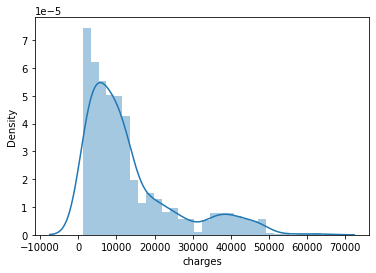

In [9]:
# Distribution of Charges column
sns.distplot(df['charges']);

In [10]:
skew_charges = df['charges'].skew()
print('Skewness of Charges is:', skew_charges)

Skewness of Charges is: 1.5158796580240388


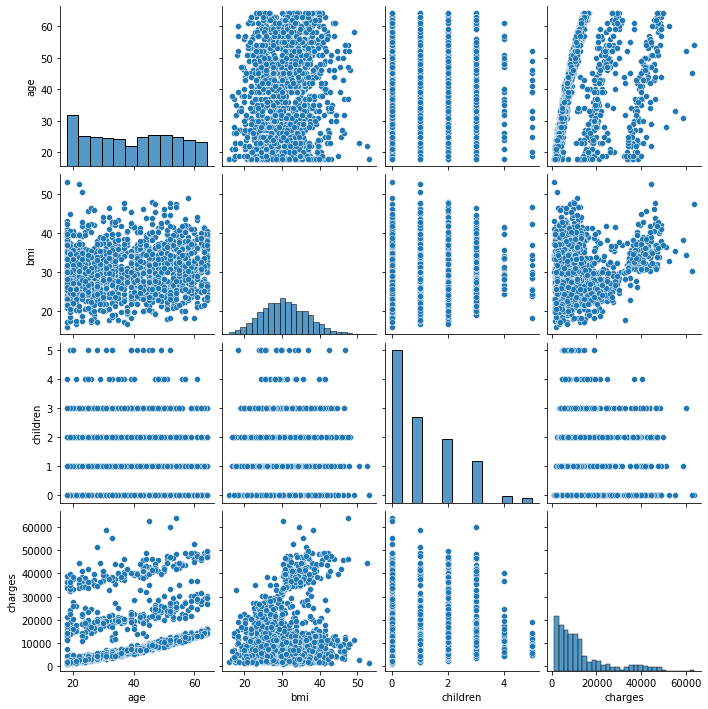

In [ ]:
sns.pairplot(df);

## Distributions

* Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
* “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
* “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
* “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
* En çok “children”’a sahip “region”’ı bulunuz.
* “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
* “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
* “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
* “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
* “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

### Distribution of BMI

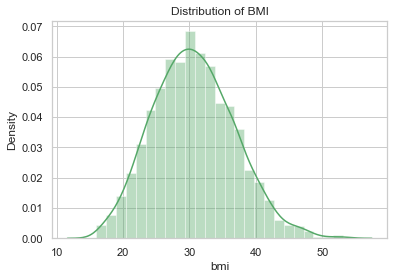

In [ ]:
plt.title("Distribution of BMI")
ax = sns.distplot(df["bmi"], color = 'g');

# normally distributed

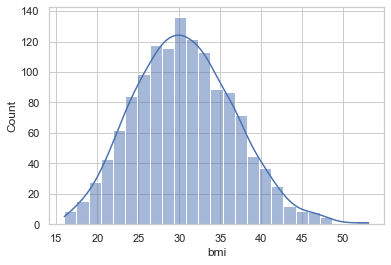

In [ ]:
sns.set(style='whitegrid')
sns.histplot(data=df, x="bmi", kde=True);

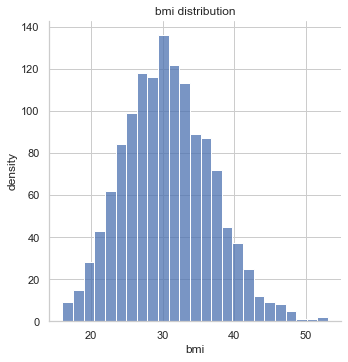

In [ ]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show();

### "smoker" and "charges"

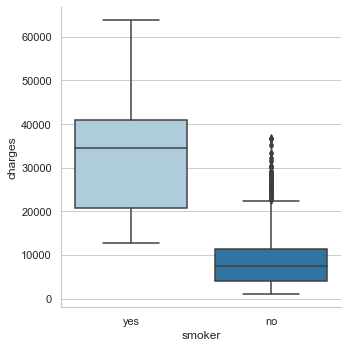

In [ ]:
# Relationship between "smoker" and "charges"
sns.catplot(x="smoker", y="charges", data=df, kind="box", palette="Paired");

### “smoker”  “region”

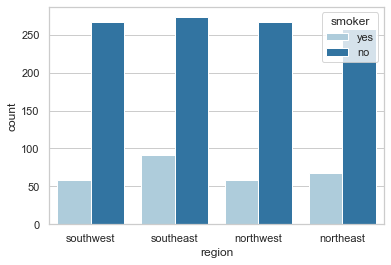

In [ ]:
# Smokers based on region
sns.countplot(x="region", hue="smoker", data=df, palette="Paired");

### “bmi”  “sex”

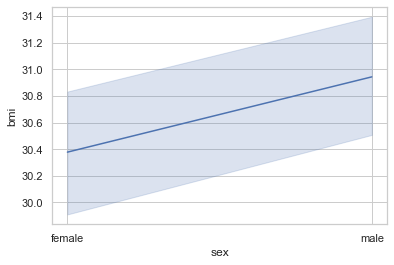

In [ ]:
# Relationship between "sex" and "bmi"
sns.lineplot(x="sex", y="bmi", data=df);

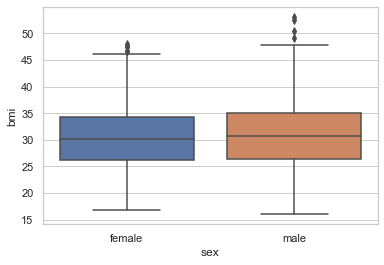

In [ ]:
# Bi variate:Sex vs bmi

sns.boxplot(x='sex',y='bmi',data=df);

### En çok “children”’a sahip “region”’ı bulunuz.

In [ ]:
# Children count based on region
children_count = df.groupby("region")["children"].sum()
children_count.sort_values(ascending=False)

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

### “Age”  “bmi” 

<AxesSubplot:xlabel='age', ylabel='bmi'>

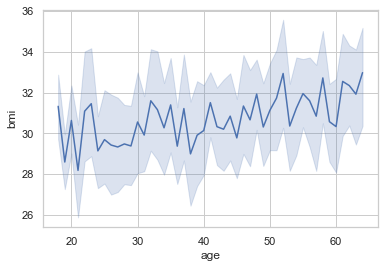

In [ ]:
# Relationship between "age" and "bmi"
sns.lineplot(x="age", y="bmi", data=df, palette="Paired");

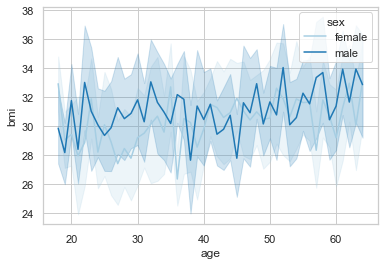

In [ ]:
# Relation between "age" and "bmi"
sns.lineplot(x="age", y="bmi", hue="sex", data=df, palette="Paired");

### “bmi”  “children” 

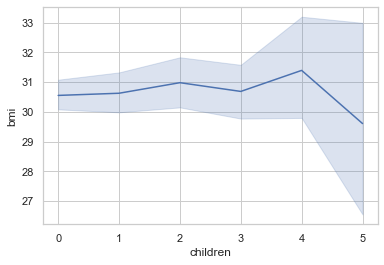

In [ ]:
sns.lineplot(x = "children", y = "bmi", data=df);

### “bmi” outlier

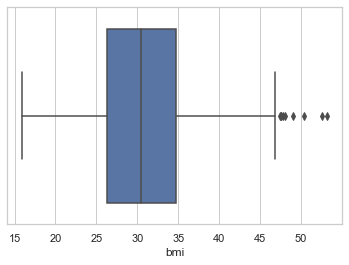

In [ ]:
sns.boxplot(x=df['bmi']);

In [ ]:
# checking count of outliers.
q25, q75 = np.percentile(df['bmi'], 25), np.percentile(df['bmi'], 75)
IQR = q75-q25
Threshold = IQR*1.5
lower, upper = q25-Threshold, q75+Threshold
Outliers = [i for i in df['bmi'] if i < lower or i > upper]
print('Total Number of outliers in BMI: ', len(Outliers))

Total Number of outliers in BMI:  9


In [ ]:
# Find outliers in the dataset
sorted_bmi = df["bmi"].sort_values()
outliers =[]
for x in sorted_bmi:
    if ((x> upper) or (x<lower)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]


### “bmi”  “charges” 

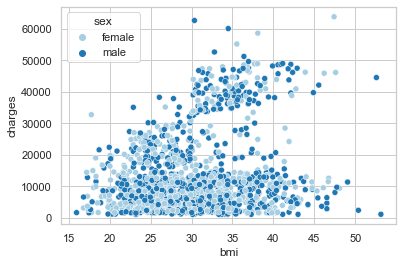

In [ ]:
# Relations between "bmi" and "charges"
sns.scatterplot(x = "bmi", y="charges", hue="sex", data=df, palette="Paired");

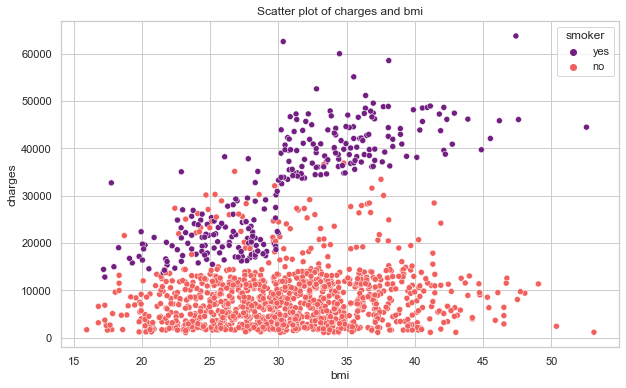

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='bmi',
                     y='charges',
                     data=df,
                     palette='magma',
                     hue='smoker')
ax.set_title('Scatter plot of charges and bmi');

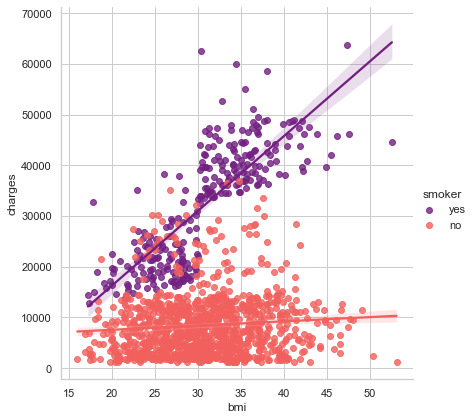

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 6);

### “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

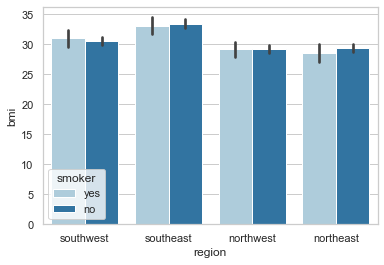

In [ ]:
# Relations between "region", "smoker" and "bmi"
sns.barplot(x = "region", y = "bmi", hue = "smoker", data=df, palette="Paired");

## PreProcess 

* Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
* Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
* Veri setini normalize ederek ölçekleyiniz.

### Split

In [11]:
q1 = df2['bmi'].quantile(0.25)
q3 = df2['bmi'].quantile(0.75)
IQR = q3-q1

In [12]:
altsınır = q1- 1.5*IQR
üstsınır = q3 + 1.5*IQR

In [13]:
aykırımin = df2[df2['bmi']<altsınır]['bmi']
aykırımax = df2[df2['bmi']>üstsınır]['bmi']

In [14]:
aykırı = pd.concat([aykırımin,aykırımax],axis = 0).index
print(aykırı)

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')


In [15]:
indexler = []
for i in aykırı:
  indexler.append(i)

print(indexler)


[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]


In [16]:
df3 = df2.drop(df2.index[indexler])
print(df3)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]


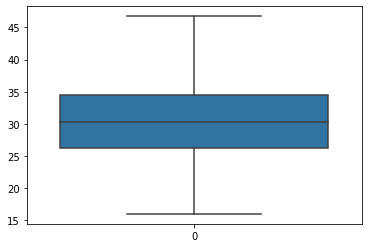

In [17]:
sns.boxplot(data= df3['bmi'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X = df3.drop(["charges"], axis=1)
y = df3["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [19]:
X_test.head()

,age,sex,bmi,children,smoker,region
991,38,female,27.835,2,no,northeast
354,18,female,38.280,0,no,southeast
311,19,female,24.700,0,no,southwest
31,18,female,26.315,0,no,northeast
996,39,female,34.100,3,no,southwest


### Encode

In [20]:
 cat_cols = ['sex'],['smoker'],['region']

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()

In [22]:
encoded_X_train = X_train.apply(le.fit_transform)
encoded_X_test = X_test.apply(le.fit_transform)

### Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(encoded_X_train) 
X_test = scaler.transform(encoded_X_test)

In [24]:
from sklearn.linear_model import LinearRegression
modelRegresyon = LinearRegression()
modelRegresyon.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = modelRegresyon.predict(X_test)

In [26]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, r2_score

print("R-Kare: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MedAE: ", median_absolute_error(y_test, y_pred))
print("EVS: ", explained_variance_score(y_test, y_pred))

R-Kare:  0.6947683795821875
MAE:  4246.797201082121
MSE:  46031305.8069359
MedAE:  1651.498641060483
EVS:  0.7165335231560881


In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

 
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print("R-Kare: ", r2_score(y_test, y_pred)) 

R-Kare:  0.633146143881945


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)


print("R-Kare: ", r2_score(y_test, y_pred))


R-Kare:  0.633146143881945
